<a name="cell-TOC-FPN"></a> 

### 0. [Computer Numbers](#cell-computer-numbers)
0. [Floating-Point Numbers ${\rm I\!F}$](#cell-FPN)
1. [Floating-Point Numbers ${\rm I\!F}$ in `Python`](#cell-FPN-py)
  - [Special "Numbers" $\pm\infty$ and `NaN`](#cell-FPN-special)
2. [Fixed-Point Numbers ${\rm I\!I}$](#cell-FxPN): Week 1 Programming Assignment Problem 1
3. [(Pseudo)random Numbers](#cell-pseudo)  
  0. [Bit Manipulation, Period, and Seed](#cell-pseudo) 
  1. [Modulus Recursion](#cell-mod-rec): Week 1 Programming Assignment Problem 2
  2. [Generalized Feedback Shift Register Methods](#cell-mod-rec-gfsr)

### 1. [Sampling](#cell-libs)
0. [Beyond Uniform Sampling](#cell-rvs0)
  0. [Inverse CDF Sampling](#cell-rvs)
  1. [Rejection Sampling](cell-MCint-rejectionSampling)
  2. [Importance Sampling](#cell-MCint-importanceSampling)
1. [Integration by Sampling](#cell-INTest)
  0. [Monte Carlo Integration](#cell-MCint)
  1. [Improving Estimation](#cell-MCint-importanceSampling-VarRed)
    - [More Importance Sampling](#cell-MCint-importanceSampling2)
  2. [More Variance Reduction](#cell-MCint-importanceSampling-VarRed2) 
    - [Antithetic Sampling](#cell-MCint-importanceSampling-antithetic)
    - [Control Variates](#cell-MCint-importanceSampling-variate)

# 0. Computer Numbers ([Return to TOC](#cell-TOC-FPN))
---

> *Computer numbers are not the same as real numbers, and the arithmatic operations on computer numbers are not exactly the same as those of ordinary arithmetic*. 
>
> *The form of a mathematical expression and the way the expression should be evaluated in practice may be quite different.*
>
> -- James E. Gentle, Statistical Computing


<a name="cell-FPN"></a> 
## 0.0 Floating-Point Numbers ${\rm I\!F}$  ([Return to TOC](#cell-TOC-FPN))
---

${\rm I\!F}$ is not ${\rm I\!R}$; but, if we employ ${\rm I\!F}$ carefully we can perform actual physical numerical computations in ${\rm I\!F}$ that can be substituted in place of their theoretical ${\rm I\!R}$ calculation counterparts.

The ***floating-point numbers*** ${\rm I\!F}$ specification may be defined as follows.

$$ \overbrace{ \left[ \underbrace{ \begin{array}{|c|} \hline \delta_0 \\ \hline \end{array}}_{\text{sign}}
\underbrace{\begin{array}{|c|c|c|c|c|c|} \hline \delta_1 & \cdots & \delta_{11}  \\ \hline \end{array}}_{\text{$p$ binary representation }}
\underbrace{1.
 \begin{array}{|c|c|c|} \hline \delta_{12}  & \cdots & \delta_{63} \\ \hline \end{array}}_{\text{$s$ binary decimal fraction}} \right] }^{\Huge \pm s \times 2^p } $$    

A 64-bit binary representation is based on the following.
- a *sign* bit: $\delta_0 \longrightarrow \pm$
- *exponent* bits: $\delta_1,  \cdots, \delta_{11} \longrightarrow p$ in $2^p$ (where $2$ is the *base* or *radix*)

  $$p = \displaystyle \sum_{i=0}^{10} \delta_{11-i} 2^i - b$$

  - $2^{11}=2048$ unique [exponent: $\delta_1,  \cdots, \delta_{11}$] representations with `00000000000` $= 0$ to `11111111111` $= 2047$
    
  - the *bias* $b = $ `01111111111` $ = 1023 = \sum_0^{9} 2^i = 2^{10}-1$ is the "middle" of the representation:
    - `1??????????` $>$ `01111111111` and `0??????????` $\leq$ `01111111111`
    - $\max p = 1024$ (although $1023$ would be symmetric: *more on this later*), $\min p = -1023$, and $0$ is `01111111111` since `01111111111` $-$ `01111111111` $= 0$, i.e., 

      $$\sum_0^{10} \delta_{11-i} 2^i = b = \sum_0^{9} 2^i \quad \Longrightarrow \quad \sum_0^{10} \delta_{11-i} 2^i - b = 0$$
  - the *range* is $\require{cancel}$$\pm2^p$ from $\pm2^{-1023}$ to $\pm2^{102\overset{\cancel{3}}{4}}$
    - $\pm2^{102\overset{\cancel{3}}{4}]} \approx \pm$`1.7976931348623157e+308` 
    - $\pm2^{-1023} \approx \pm$`1.1125369292536007e-308` 
     
    where the approximations above are *base $10$* representations which might feel more interpretable.

- *significand/mantissa* bits: $s = 1.\delta_{12}\cdots\delta_{63} \in [1,2)$ are (*base $2$*) *binary decimal representations*
  
  $$ s = 2^0 + \sum_{i=1}^{52} \delta_{11+i} 2^{-i} \quad \text{ so that } \quad x = \pm \, 2^p \overbrace{\left(2^0 + \sum_{i=1}^{52} \delta_{11+i} 2^{-i} \right)}^{s}$$  
  
  The (*base $2$*) *binary decimal representation* $\delta_{12}=\delta_{13}=1, \delta_{i>13}=0$ is $s=1.11000_\cdots$ which is $1.75$ in *base $10$*
  - $s$ is *normalized*, meaning in conjuction with $\pm \, 2^p$ it facilitates the scientific notation $\pm s \times 2^p$
  - $1 \leq s < $ *base*, so for *base $2$* then $1 \leq s<2$; except,
    - the *hiddent digit* `1.` is included unless all *exponent bits* are `0` 
    - so when the *exponent* $p=-1023$ the *hidden bit* "disappears" and the first *significand bit* $\delta_{12}$ now multiplies $2^{-1}$ rather than $2^0$; the second *significand bit* $\delta_{13}$ now multiplies $2^{-1}$ from $2^{-2}$; and in general the *significand bit* $\delta_{11+i}$ now multiplies $2^{-i+1}$ rather than $2^{-i}$.

   This *graceful underflow* extends the lower end of the *exponent range* from $p =$ `-1023` to $p =$ `-1023-51 = -1074` (since the last bit now corresponds to $2^{-51}$), thereby increasing the precision near `0`.
  
  - So actually, the limits for the *significand* $s$ are $2^{-51} \leq s < 2$ when $p =$ `-1023` and the *hidden bit* is turned off for *graceful underflow*. 

Notice that when $p >$ `-1023` and the *significand* $s$ is not in the *graceful underflow* regime, the smallest contributing bit in the representation is $2^{-52} \approx $ `2.220446049250313e-16`, which occurs when $\delta_{63}=1$ and $\delta_{12\leq i<62}=0$.

- However, this means that in this $16^{th}$ *base $10$* *decimal* location, the smallest represntable digit is `2` $>$ `1`.
- Thus, not every digit can be represented in this $16^{th}$ *base $10$* *decimal* location; so, only the first 15 digits are *exactly correct*; and, thus, `resolution=1e-15` or `precision=15`.

<a name="cell-FPN-py"></a> 
## 0.1 Floating-Point Numbers ${\rm I\!F}$ in `Python` ([Return to TOC](#cell-TOC-FPN))
---

In [14]:
# You can look at the available resolution of floating-point numbers directly:
print(2**-52, ": 16 total digits present")
print(2**-100, ": 16 total digits present, still")

In [14]:
# You can look at the available range directly (and break it):
print(10.**308, ': "Cool", followed by "Not Cool"')
print(10.**309, ': "Not Cool"')

In [14]:
# play around to find out the range limits and behavior:
#2.**-(1023+52) # every single exponent and significand bit is 0
#2.**-(1023+51) # all exponent bits are 0 but the last significand bit is 1
#2.**-1023 # the first significand bits is 1 and all other significand bits are 0
#2.**1024 # so actually p=1024 is the limit, not p=1023
#2.**1023

In [ ]:
# You can also just look up these specs:
import numpy as np # give package a simpler standard alias
# https://numpy.org/doc/stable/reference/generated/numpy.finfo.html
np.finfo(float), np.finfo(float).precision

In [18]:
# You can look at the bit string representations as well:
# https://pypi.org/project/bitstring/
! pip install bitstring # install a package not immediately available

In [18]:
import bitstring
# Check out www.h-schmidt.net for an interactive 32-bit floating point demonstration.
# https://stackoverflow.com/questions/16444726/binary-representation-of-float-in-python-bits-not-hex
# i.e., bitstring.BitArray(float=1.0, length=32).bin
print(bitstring.BitArray(float=2.5, length=64).bin)

In [18]:
# Here's the graceful underflow from the hidden digit in action:
print(bitstring.BitArray(float=2.**-(1023+0), length=64).bin)
print(bitstring.BitArray(float=2.**-(1023+48), length=64).bin)

In [36]:
# Here are some interesting floating point numbers:
print("Largest possible 64-bit floating point number 1.7976931348623157e+308:")
print(bitstring.BitArray(float=1.7976931348623157e+308, length=64).bin)
print(" note the ^0^ there... interesting...")

print("\n1:", bitstring.BitArray(float=1., length=64).bin)
print("0:", bitstring.BitArray(float=0., length=64).bin)

<a name="cell-FPN-special"></a> 
### $\circ$ Special "Numbers" $\pm\infty$ and `NaN` ([Return to TOC](#cell-TOC-FPN))
---

Numeric values are not the only elements in the set of floating-point numbers. Namely, `NaN` and `Inf` are floating-point "numbers", too. It's just that `NaN` and `Inf` have *special reserved representations*. 

In [25]:
import numpy as np
type(0.), type(1.), type(2**-52), type(np.Inf), type(np.NaN) 

In [25]:
print("0     ", bitstring.BitArray(float=0., length=64).bin)
print("1     ", bitstring.BitArray(float=1., length=64).bin)
print("np.Inf", bitstring.BitArray(float=np.Inf, length=64).bin)
print("np.NaN", bitstring.BitArray(float=np.NaN, length=64).bin)
# Do you see what the special reserved representations entail?

The *significand* bits are immaterial when representing `Inf`, so they get used to distinguish `NaN` from `Inf`. So, to represent `NaN`
- all *exponent* bits are `1` (as with `Inf`)
- and additionally at least one *signficand* bit (by default the first) is `1`

  (as opposed to `Inf`, where all the `signficand` bits are `0`)

Here are some examples of how Python handles these ***special numbers***.

In [26]:
print("0    :", bitstring.BitArray(float=0, length=64).bin)
print("np.pi:", np.pi)
print("np.pi:", bitstring.BitArray(float=np.pi, length=64).bin)

print("\n np.Inf         :", bitstring.BitArray(float=np.Inf, length=64).bin)
print(" np.Inf + np.pi :", bitstring.BitArray(float=np.Inf+np.pi, length=64).bin)
print(" np.Inf * np.pi :", bitstring.BitArray(float=np.Inf*np.pi, length=64).bin)
print(" np.pi / np.Inf :", bitstring.BitArray(float=np.pi/np.Inf, length=64).bin)
print("-np.Inf         :", bitstring.BitArray(float=-np.Inf, length=64).bin)
print(" 10**np.Inf     :", bitstring.BitArray(float=10.**(np.Inf), length=64).bin)
print(" 10**-np.Inf    :", bitstring.BitArray(float=10.**(-np.Inf), length=64).bin)

print(" np.Inf > np.pi :", np.Inf > np.pi)
print(" np.Inf < np.pi :", np.Inf < np.pi)
print("-np.Inf < np.pi :", -np.Inf < np.pi)

print("\n np.Inf - np.Inf :", np.Inf-np.Inf)
print(" np.Inf / np.Inf :", np.Inf/np.Inf)
print(" 0 * np.Inf      :", 0*np.Inf)

print("\nnp.NaN          :", bitstring.BitArray(float=np.NaN, length=64).bin)
print("np.Inf          :", bitstring.BitArray(float=np.Inf, length=64).bin)
print("np.NaN + np.pi  :", bitstring.BitArray(float=np.NaN+np.pi, length=64).bin)
print("np.NaN + np.Inf :", bitstring.BitArray(float=np.NaN+np.Inf, length=64).bin)
print("np.NaN < np.pi  :", np.NaN < np.pi)
print("np.NaN < np.Inf :", np.NaN < np.Inf)

Note that the `np.NaN` special number is only accessibly through `np.Inf` and `np.NaN` operations or direct specifications (e.g., as "missing values"). This is preferable since if numerical operations that are not defined we'd prefer for the operation to raise a useful error instead of just returning in `np.NaN`.

In [27]:
0. / 0.

<a name="cell-FxPN"></a> 
## 0.2 Fixed-Point Numbers ${\rm I\!I}$  ([Return to TOC](#cell-TOC-FPN))
---

The material so far has focussed on ***floating-point numbers*** ${\rm I\!F}$ (which model, or approximate ${\rm I\!R}$). Only the *exponent* and the *sign bits* from ***floating-point numbers*** are needed to implement ***fixed-point numbers*** ${\rm I\!I}$ (which model, or approximate $\mathbb{Z}$). However, there's still some room for interesting specifications for ${\rm I\!I}$, such as the *two's complement* representation of negative numbers (described in the last paragraph on page 86 in the James E. Gentle's **Computational Statistical** textbook).

- You'll create a binary string representation for ***fixed-point numbers*** ${\rm I\!I}$ with a simple sign bit (rather than ***two's complement***) scheme to represent positive and negative integers in the [Week 1 Programming Portfolio Assignment]().

## 0.3 (Pseudo)random Numbers ([Return to TOC](#cell-TOC-FPN))
---

Assuming the world isn't a simulation, we can observe ***real randomness*** in nature. Things that we might consider random are: 
- How many children does a person in a population have? 
- How many leaves does a tree in a forest have?
- How much time is there between the arrival of two waves?
- How many cars will we observe in a certation at a specific time of day?

While such numbers can be measured and inputed to a computer for use (as is done by [random.org](https://www.random.org/)), most of the time when we say we're using "random numbers" in the context of a computer, we're actually using ***pseudorandom numbers***.

***Pseudorandom numbers*** are deterministic sequences of numbers which exhibit apparent "randomness" to both the casual and critical observer.

- From a programming perspective, the reproducibility pseudorandom number generation is a very useful property facilitating troubleshooting and testing.

<a name="cell-pseudo"></a>
### 0.3.0 Bit Manipulation, Period, and Seed ([Return to TOC](#cell-TOC-FPN))
--- 

***Floating point numbers*** ${\rm I\!F}$ (which model, or approximate ${\rm I\!R}$) and ***fixed-point numbers*** ${\rm I\!I}$ (which model, or approximate $\mathbb{Z}$) are stored as ***bitstrings***.  To produce ***pseudorandom numbers***, then, ***bitstrings*** can be deterministically "shuffled" (or transformed) into other ***bitstrings***. This creates ***pseudorandom number sequences*** which will always be the same when started from the same ***bitstring***. Of course, the "quality" of the deterministically generated ***pseudorandom number sequences*** depends on the apparent "randomness" of the generated sequence. This sort of "deterministic shuffling" with ***bitstring manipulation*** is how ***pseudorandom numbers*** are created on computers.

- The starting point of a ***pseudorandom number sequences*** is called the ***pseudorandom number seed***, or the ***random number seed***, or just the ***seed***.

- Since computer number representations are finite, a deterministic function that produces the next number based on the current ***state*** will eventually complete its ***period*** and begin to cycle.

  > A good ***pseudorandom number generator*** will produce ***pseudorandom number sequences*** with a long ***period*** so it doesn't provide cycling sequences of "random" numbers.

<a name="cell-mod-rec"></a>

### 0.3.1 Modulus Recursion ([Return to TOC](#cell-TOC-FPN))
---

***Bitstring manipulation*** can be implicitly achieved with mathematical ***modulus recursion*** formulations such as 

 $$u_k = au_{k-1} \text{ mod } m$$

which produces the sequence $\{u_k: k=1,\cdots,n\}$ based on some ***seed*** $u_0$. The ***modulus recursion*** specification here is a ***first order sequential congruential method***.

- Rather than leveraging a ***bitstring manipulation*** algorithm directly, in the [Week 1 Programming Assignment]() you'll create apparent "randomness" with ***modulus recursion*** and explore ***recursion***, ***pseudorandom number sequences***, and ***period*** etc. 

<a name="cell-mod-rec-gfsr"></a>

### 0.3.2 Generalized Feedback Shift Register Methods ([Return to TOC](#cell-TOC-FPN))
---

A standard ***bitstring manipulation pseudorandom number generator*** is the ***Mersenne Twister***. The ***Mersenne Twister*** is a ***generalized feedback shift register (GFSR)*** method which produces ***bitstring manipulation*** with very good apparent "randomness" properties. The standard version of the ***Mersenne Twister*** is called `MT19937` because it has a ***period*** of $2^{19937-1}$ unique numbers before it begins to re-cycle through its ***pseudorandom number sequence***.

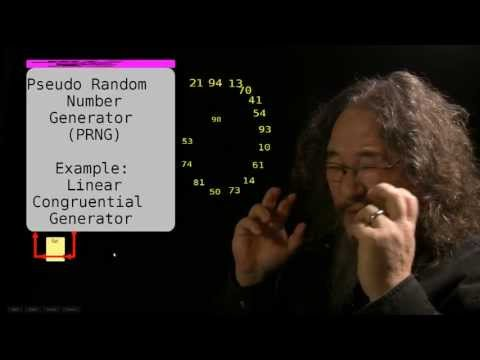

In [ ]:
from IPython.display import YouTubeVideo
# https://www.youtube.com/watch?v=_tN2ev3hO14?t881s
# use the above link to start at t881s
YouTubeVideo('_tN2ev3hO14', width=1024, height=512)

> GFSR methods are described in more detail starting on page 16 of Keith Knight's STA410 [notes4.pdf](https://q.utoronto.ca/courses/296804/files?preview=24222606) document.

<a name="cell-libs"></a>
# 1. Sampling ([Return to TOC](#cell-TOC-FPN))
--- 

Random number generation for specific probability distributions in `Python` is available from the [pleasantly comprehensive](https://docs.scipy.org/doc/scipy/reference/stats.html) statistical library [`scipy.stats`](https://scipy.github.io/devdocs/tutorial/stats.html), which by default uses the [NumPy `rng`](https://scipy.github.io/devdocs/tutorial/stats.html#random-number-generation) for pseudorandom number generation. 
 
- Python's [`random`](https://docs.python.org/3/library/random.html) functionality "uses the Mersenne Twister as the core generator", but Numerical Python, (i.e., [NumPy](https://numpy.org/doc/stable/user/whatisnumpy.html)) [`np.random`](https://numpy.org/doc/stable/reference/random/#quick-start) functionality uses "PCG64 which has better statistical properties than the legacy MT19937" (which is nonetheless [still available](https://numpy.org/doc/stable/reference/random/bit_generators/mt19937.html)) as an option. 

> In Python, resources like `scipy.stats` and those previously used above are accessed with module imports, assuming the modules have been installed in the running Python environment. The first three `import` statements shown below were all run previously above, and the fourth import statement for `scipy.stats` is another form available for import statements. 

In [29]:
import bitstring # `! pip install bitstring` if this isn't yet installed
# `pip install` will generally install anything you ask it to install.
# More careful version capatiblity management is available with 
# `conda install` or `mamba install` (a faster compatibility solver).
from IPython.display import YouTubeVideo # loading a function from a submodule
import numpy as np # loading a module with a shorthand name
from scipy import stats # loading just the submodule `stats`

<a name="cell-rvs0"></a>
## 1.0 Beyond Uniform Sampling ([Return to TOC](#cell-TOC-FPN))
--- 

Analysis and testing (of the apparent "randomness") of ***pseudorandom numbers*** is a less active area of reasearch today than it once was, as 
***pseudorandom number generation*** from specific distributions for use by the practitioner is generally considered "solved" by libraries like [`scipy.stats`](https://scipy.github.io/devdocs/tutorial/stats.html). Thus, algorithmic details for sampling from specific important distributions (such as normal distributions) will be ignored in favor of more general sampling methods. Suffice it to say that much of the ***pseudorandom number generation*** provided by [`scipy.stats`](https://docs.scipy.org/doc/scipy/reference/stats.html) is created on the basis of ***bitstring*** "shuffling" followed by general methods that are able to repurpose these in a manner that makes them representative of samples from a chosen ***target distribtion***. 

> For some examples of sampling methods for normal distributions, please see pages 1-15 of Keith Knight's STA410 [notes6.pdf](https://q.utoronto.ca/courses/296804/files?preview=24222606) document, while the more general methods covered in the notes below are detailed in the [notes5.pdf](https://q.utoronto.ca/courses/296804/files?preview=24222587) and [notes4.pdf](https://q.utoronto.ca/courses/296804/files?preview=24222606) documents.

<a name="cell-rvs"></a>
### 1.0.0 Inverse CDF Sampling ([Return to TOC](#cell-TOC-FPN))
--- 

The "naive" general solution to sampling from specified probability distributions is to apply the ***inverse CDF transformation*** to ***uniform random variables*** $U_i \sim U(0,1)$ which are generated from ***bitstring manipulation*** based ***pseudorandom number generation*** algorithms such as `MT19937` and `PCG64`. Specifically, for ***inverse CDF transformation*** $x = P_X^{-1}(u)$ for the random variable $X$ 

$$Pr\left(P_X^{-1}(U_i) \leq x\right) = Pr\left(X_i \leq x\right) = P_X(x) \quad \Longrightarrow \quad X_i \sim p_X(x)$$


|![](https://upload.wikimedia.org/wikipedia/commons/c/cc/Inverse_Transform_Sampling_Example.gif)|
|-|
|https://en.wikipedia.org/wiki/Inverse_transform_sampling|

In [30]:
import matplotlib.pyplot as plt
n=10000
u,X = stats.uniform.rvs(size=n),stats.gamma(a=3)
x = X.ppf(u)
support = np.linspace(0,10,100)
plt.hist(X.ppf(u), density=True, bins=100); plt.plot(support, X.pdf(support));

<a name="cell-MCint-rejectionSampling"></a>

### 1.1.1 Rejection Sampling ([Return to TOC](#cell-TOC-FPN))

---

Another way to sample from $p_X(x)$ is to sample from a ***proposal distribution*** $\tilde p_{\tilde X} (\tilde x)$ that is different than the ***target distribution*** $ p_{ X} ( x)$ and then subsequently correct the representation of the sampling to match the intended ***target distribution*** $p_{ X} ( x)$ distribution through a ***rejection sampling*** process.


0. If there is some scaler $c$ such that $c \times \tilde p_{\tilde X} ( x) > p(x)$ for all $x$ then proceed to step 1; otherwise, ***rejection sampling*** based on $\tilde p_{\tilde X}$ will not work
1. Sample $\tilde X_j \sim \tilde p_{\tilde X} (\tilde x)$ 
2. Keep $X_i=\tilde X_j$ with probability $\frac{p_{ X}(\tilde X_j)}{c \tilde p_X (\tilde X_j)}$
3. Discard $\tilde X_j$ if it was not kept, and return to step 1 as desired 

> ***Rejection sampling*** turns a univariate sampling problem $X_i \sim p_X(x)$ into a two-dimensional problem $(\tilde X_j,U_j) \sim \tilde p(\tilde x,u) = \tilde p(\tilde x) \tilde p(u)$ where the conditional distribution
>
> $$\tilde p\left(X\big| U < \frac{p_X(X)}{c \tilde p_{\tilde X}(X)} \right) = p_X(X)$$
>
> is identical to the distribution from which sampling is required. 

In [57]:
# distribution of interest
X = stats.beta(2,2)
support = np.linspace(0,1,100)
plt.plot(support, X.pdf(support))

# and distribution tilde_p(tilde_x) such that c*tilde_p(x)>p(x) for all x
tilde_X = stats.uniform()
n = 1000
tilde_x = X.rvs(size=n)
# along with other 
u = stats.uniform.rvs(size=n)

c=1.6
plt.plot(support, c*tilde_X.pdf(support)); plt.xlabel('X'); plt.ylabel('U')
plt.scatter(tilde_x, c*u, color=['b' if u<(X.pdf(x)/c*tilde_X.pdf(x)) else 'r' for x,u in zip(tilde_x,u)]);

<a name="cell-MCint-importanceSampling"></a>

### 1.1.2 Importance Sampling ([Return to TOC](#cell-TOC-FPN))

---

Rather than filtering the samples of a ***proposal distribution*** to create a sample set reflecting the ***target distribution*** of interest $X_i \sim p(x)$ as in ***rejection sampling***, all of the samples of the ***proposal distribution*** $\tilde X_i \sim \tilde p(x)$ can be used in a weighted manner according to ***importance weights*** 

$$W_i^* = \frac{p(\tilde X_i)}{\tilde p(\tilde X_i)} \quad \text{ and } \quad W_i = \frac{ W_i^*}{\sum_{i=1}^n  W_i^*}$$

where the $W_i$ weighted random variables $\tilde X_i$ are used in place of random variables $X_i \sim p(x)$.

If only $q(x)$ proportional to the desired ***target distribution*** $p(x) = cq(x)$ is known, ***importance sampling*** can still produce samples from $p(x)$ because the unknown proportionality constant $c$ will cancel in the normalization $\require{cancel}$ since

$$W_i = \frac{ W_i^*}{\sum_{i=1}^n  W_i^*} = \frac{ p(\tilde X_i)/\tilde p(\tilde X_i)}{\sum_{i=1}^n  p(\tilde X_i)/\tilde p(\tilde X_i)} = \frac{ \cancel{c}q(\tilde X_i)/\tilde p(\tilde X_i)}{\sum_{i=1}^n  \cancel{c}q(\tilde X_i)/\tilde p(\tilde X_i)}$$

> In Bayesian analysis a posterior can be evaluated proportionally as
> 
> $$p(\theta | \mathbf{x}) \propto f(\mathbf{x}|\theta) p(\theta) $$
> 
> but usually not exactly because the (marginal likelihood) normalizing constant $f(\textbf{x})$ tends to be very expensive to compute. 
> 
> Peforming ***importance sampling*** for a posterior distribution as the ***target distribution*** with the prior distribution as the ***proposal distribution*** $p(\theta)$ leads to ***importance weights*** which are simply the normalized values of the likelihood 
> 
> \begin{align*}
W_i = {} & \frac{f(\mathbf{x}|\theta_i)}{\sum_i f(\mathbf{x}|\theta_i)} \; \text{ since} \\
W_i^* = {} & \frac{p(\theta_i | \mathbf{x})}{p(\theta_i)} = \frac{f(\mathbf{x}|\theta_i) p(\theta_i)\overset{\text{normalization}}{/ \cancel{f(\mathbf{x})}}}{p(\theta_i)} = f(\mathbf{x}|\theta_i)
\end{align*}

In [160]:
# the importance sampling distribution tilde_p(tilde_x)
tilde_X = stats.uniform()
n = 100000
tilde_x = tilde_X.rvs(size=n)

# the target distribution p(x)
X = stats.beta(2,2)
w = X.pdf(tilde_x)/tilde_X.pdf(tilde_x)
w = w/w.sum()

support = np.linspace(0,1,100)
plt.hist(tilde_x, density=True, bins=50, alpha=0.25)
plt.plot(support, tilde_X.pdf(support))

plt.hist(tilde_x, weights=w, density=True, bins=50, alpha=0.5)
plt.plot(support, X.pdf(support));

<a name="cell-INTest"></a>

# 1.1 Integration by Sampling ([Return to TOC](#cell-TOC-FPN))

---

If we can write

$$ \int f(x) dx \; = \int g(x)p(x) dx \quad \text{ then } \quad \int f(x) dx = E_{X\sim p_X(x)}[g(x)]$$

so  

$$\hat \theta \; \text{ estimating }\; E_X[g(x)] \quad \text{ also estimates } \quad \int f(x) dx$$

If the ***central limit theorem*** for $\hat \theta$ estimating $E_X[g(x)]$ applies, then the ***standard error*** of the estimator defines how accurate our ***integral estimation*** is.

<a name="cell-MCint"></a>

## 1.1.0 Monte Carlo Integration ([Return to TOC](#cell-TOC-FPN))

---

Since 

$$\int_a^b \!\!\!\! f(x) \frac{1}{b-a} dx = E_X[f(X)] \text{ for } X\sim U(a,b)$$

if 

$$Y_i = (b-a)f(X_i) \quad \text{ then } \quad E_X\left[Y_i\right] \; = \int_a^b \!\!\!\!(b-a) f(x) \frac{1}{(b-a)} dx \; = \int_a^b \!\!\!\!f(x) dx \quad \text{ and } \quad  \bar Y_n \sim N\left(\int_a^b \!\!\!\! f(x)  dx ,\frac{Var[Y]}{n} \right)$$

and

$$\frac{\bar Y_n - \int_a^b \!\!f(x) dx}{\sqrt{\widehat{Var[Y]/n}}} \sim t_{n-1}$$

so 

$$\text{the integration } \quad \displaystyle \int_a^b \!\!\!\!f(x) dx \quad \text{ is estimated by } \quad \bar Y_n = \frac{\sum_{i=1}^n Y_i}{n} \quad \text{ where } \quad Y_i = (b-a)f(X_i) \; \text{ and } \; X_i\sim U(a,b) $$

|![](https://enricodegiuli.files.wordpress.com/2017/05/pi_30k.gif?resize=500%2C500)|
|-|
|https://en.wikipedia.org/wiki/Monte_Carlo_method|


In [45]:
from scipy.integrate import quad

plt.figure(figsize=(12,6))
n = 50
for i in range(500):
  mcint = (stats.expon(scale=1/5).pdf(stats.uniform.rvs(size=n))**2).cumsum()/np.arange(1,n+1)
  plt.plot(mcint[10:], 'b:', alpha=0.5)
  mcint = (stats.expon(scale=1/5).pdf(stats.truncexpon(5, scale=1/5).rvs(size=n)))
  mcint = mcint.cumsum()/np.arange(1,n+1)
  plt.plot(mcint[10:], "y:", alpha=0.5)
  
mcint = (stats.expon(scale=1/5).pdf(stats.uniform.rvs(size=n))**2).cumsum()/np.arange(1,n+1)
plt.plot(mcint[10:], c='b', label="expectation of squared exponential using standard unit uniform")
mcint = (stats.expon(scale=1/5).pdf(stats.truncexpon(5, scale=1/5).rvs(size=n)))
mcint = mcint.cumsum()/np.arange(1,n+1)
plt.plot(mcint[10:], c='y', label="expectation of exponential using truncated exponential")
plt.plot((n-10)*[quad(lambda x: stats.expon(scale=1/5).pdf(x)**2, a=0,b=1)[0]], c='red', label="truth")
plt.legend();

<a name="cell-MCint-importanceSampling-VarRed"></a>

## 1.2.1 Improving Estimation ([Return to TOC](#cell-TOC-FPN))
----

Consider the two following integral estimations, which are equivalent by [the law](https://math.stackexchange.com/questions/415196/proving-the-law-of-the-unconscious-statistician) of the [unconscious statistician](https://en.wikipedia.org/wiki/Law_of_the_unconscious_statistician)

$$\int_0^1 5e^{-5x}5e^{-5x} dx = E_{X\sim \text{uniform}(0, 1)}[25e^{-10x}]= E_{X\sim \text{truncexpon}(5, 1)}[5e^{-5x}] $$ 

If by sampling from some distribution other than a uniform distribution as in ***Monte Carlo integration***
- computations of $g(x)\approx 0$ which do not meaningfully contribute to the integral are avoided, while
- computations of $|g(x)| > 0$ which  meaningfully contribute to the integral are enriched

then the efficiency of the estimation of the integral $\int \!\!g(x)p(x) dx$ will be improved.  

> This can be understood as reducing the variation of the "sampled pdf" values
>
> $\;\;$ `np.var(expon(scale=1/5).pdf(truncexpon(5, scale=1/5).rvs(size=n))))` 
>
> $<$ `np.var(expon(scale=1/5).pdf(uniform.rvs(size=n))**2)`
>
> while still maintaining the desired expected value.


Thus, effective use of ***inverse CDF sampling***, ***rejection sampling***, and ***importance sampling*** can provide increased computational efficiency for integral estimation. 

In [43]:
x=np.linspace(0,1,100)
plt.plot(x, 25*np.exp(-10*x));

In [51]:
print("By sampling in a proportional manner to the density evalutions")
print("the variance of the resulting 'pdf samples'")
print(np.var(stats.expon(scale=1/5).pdf(stats.truncexpon(5, scale=1/5).rvs(size=n))))
print("is much less than")
print(np.var(stats.expon(scale=1/5).pdf(stats.uniform.rvs(size=n))**2))
print("the variance of the 'pdf samples' that do not try to minimize")
print("the presence of 'extreme value' 0's")

<a name="cell-MCint-importanceSampling2"></a>

### More Importance Sampling ([Return to TOC](#cell-TOC-FPN))
---

The example above demonstrates that estimation of

$$\int g(x) p(x) dx$$

is most efficient if $p(x) \propto g(x)$. When the available factorization $g(x)p(x)$ does not lend itself to this objective, ***importance sampling*** based on

$$\int g(x) p(x) dx = \int g(x) \frac{p(x)}{\tilde p(x)} \tilde p(x) dx$$

can help improve the proportionality by and thereby reduce the variance of the estimation.

> ***Importance sampling*** is effective at reducing sampling variance by choosing $\tilde p(x)$ which
> 
> 1. rarely samples $x$ where $g(x)\approx 0$ so $\left(g(x) \frac{p(x)}{\tilde p(x)} \right)$ remains large
> 2. has heavier tails than $p(x)$ so the weights $W_i^* = \frac{p(x)}{\tilde p(x)}$ do not explode
>
> so that $\left(g(x) \frac{p(x)}{\tilde p(x)} \right)$ is effectively bounded and therefore has reduced variance.
> ***Importance sampling*** thus oversamples $\left(g(x) \frac{p(x)}{\tilde p(x)} \right)$ values which dominate the integration so that the function is better represented and more precisely estimated in the key areas, but then appropriately downweighting the oversampling to maintain the correct expected value.
> 
> - When ***importance sampling***  is working well the ***importance weights*** will be relatively balanced so that the full diversity of the ***importance samples*** meaningfully contribute to the integral estimate, and the ***effective sample size*** remains close to the number of ***importance samples*** being used.

For a posterior distribution $p(\theta|\mathbf{x}) = \text{Beta}(2,2)$, the posterior probability

$$\Pr(0.95 < \theta < 0.99 | \mathbf{x}) = E_{\theta|\mathbf{x}}[1_{[.95,.99]}(\theta)] = \int 1_{[.95, .99]}(\theta) p(\theta|\mathbf{x}) d\theta$$

will not be most efficiently calculated by naively basing estimation on samples from $p(\theta|\mathbf{x}) = \text{Beta}(2,2)$. Instead, ***importance sampling*** from a uniform distribution (which is equivalent to ***Monte Carlo integration***) biases samples to be more useful for the integration estimation, by attempting make the proportionality 
$g(x) \frac{p(x)}{\tilde p(x)} \propto \tilde p(x)$ better than $g(x) \propto p(x)$ so that $\text{Var}_{\tilde p(x)}(g(x) \frac{p(x)}{\tilde p(x)}) < \text{Var}_{p(x)}(g(x))$.

In [179]:
X = stats.beta(2,2)
tilde_X = stats.uniform()
n = 10000
tilde_x = tilde_X.rvs(size=n) 
x = X.rvs(size=n)
w_ = X.pdf(tilde_x)/tilde_X.pdf(tilde_x)
w = w_/w_.sum() # = X.pdf(tilde_x) in this case

def region(x, a=.95,b=.99):
  return (x>a)&(x<b)

print("The Analytical Truth is: ", X.cdf(.99)-X.cdf(.95))
print("Naive Beta(2,2) Samples: ", np.mean(region(x)))
print("Importance Sampling V1: ", np.mean(region(tilde_x)*w_))
print("Importance Sampling V2: ", (w*region(tilde_x)).sum())

In [179]:
print("The variances on the samples used to estimate the integration are")
print("Naive Beta(2,2) Samples: ", np.var(region(x)))
print("Importance Sampling V1: ", np.var(region(tilde_x)*X.pdf(tilde_x)))
print("Importance Sampling V2: ", (w*(region(tilde_x)-(w*region(tilde_x)).sum())**2).sum()) # np.cov(region(tilde_x), aweights=w)

In [179]:
# Why are there V1 and V2 versions of Importance Sampling?
# Notice how their estimates are highly correlated but their variances are quite different!


When estimating the integral using ***importance sampling***

\begin{align*}
\int g(x) p(x) dx & = {} \int g(x) \frac{p(x)}{\tilde p(x)} \tilde p(x) dx\\
E_{p(x)}[g(x)] & = {} E_{\tilde p(x)}\left[g(x) \frac{p(x)}{\tilde p(x)} \right]
\end{align*}

the prescribed estimator is actually

$$\overline{W^* Y} =  \underbrace{\frac{\sum_{i=1}^n W_i^* Y_i}{n}}_{E_{\tilde p(x)}[W_i^*]=1} \quad \text{ as opposed to } \quad \overline{Y} = \underbrace{\sum_{i=1}^n W_i Y_i}_{E_{\tilde p(x)}[W_i]=\frac{1}{n}}$$

$$\text{where } \quad Y_i = g(\tilde X_i) \quad \tilde X_i \sim \tilde p(x) \quad  W_i^* = \frac{p(\tilde X_i)}{\tilde p(\tilde X_i)} \quad W_i = \frac{ W_i^*}{\sum_{i=1}^n  W_i^*}$$

> The former estimator is "recommended" because the latter is slighly biased since it can be shown that
>
> $$E[\overline{W^* Y}] =  E_{p(x)}[g(x)] \quad \text{ but } \quad E[\overline{Y}] = E[\overline{W^* Y}] \left(1 + \frac{1}{n}Var(W_i^*)\right) - \frac{1}{n}Cov(W_i^*Y_i, W_i^*) + \mathcal{O}(n^{-2})$$
> 
> However, the bias can be estimated (and adjusted) with $\widehat{\text{Var}}(W_i^*)$ and $\widehat{\text{Cov}}(W_i^*Y_i, W_i^*)$; and, it can additionally be shown that the ***mean squared error*** 
>
> $$\text{E}[(\overline{Y} - \text{E}[\overline{Y}])^2] = \text{Var}(\overline{Y}) + \text{bias}[\overline{Y}]^2 <  MSE(\overline{W^* Y})$$
>
> whenever
>
> $$\quad \text{ whenever } \quad \text{Cor}(W_i^*Y_i, W_i^*) > \frac{\text{cv}(W^*_i)}{2\text{cv}(Y_i)}$$
>
>   where, e.g., $\text{cv}(Y_i) = \frac{\sigma_{Y_i}}{\mu_{Y_i}}$ is the ***coefficient of variation***.

In [179]:
var_wy, cov_wy_w, cov_wy_w, var_w = np.cov(w*region(tilde_x), w).flatten()
mean_wy, mean_w = np.mean(w*region(tilde_x)), np.mean(w)
print("     bias", "*",(1+var_w/n), '-', cov_wy_w/n, '+ O(', n**-2, ')')

print("\ncor(YW*, W*)", cov_wy_w/(np.sqrt(var_wy*var_w)))
print(">")
print("cv(W*)/(2cv(YW*)", (np.sqrt(var_w)/mean_w)/(2*np.sqrt(var_wy)/mean_wy))
print("?\n\nIf not, the MSE for Importance Sampling V1 should be smaller")
print("than the MSE for Importance Sampling V2, as it is")

> Returning to our two estimators $\overline{W^* Y}$ and $\overline{Y}$, for the two samples 
> 
> 1. $\{X_i = x_i: \; X_i \sim p(x) \text{ for } i=1,\cdots, n\}$ 
> 
> 2. $\{\tilde X_i = \tilde x_i: \; \tilde X_i \sim \tilde p( \tilde x) \text{ for } i=1,\cdots, n\}$
> 
> and two sets of weights
> 1. $\left\{w_i^* = \frac{p(x_i)}{\tilde p(x_i)} : i=1,\cdots, n 
> \right\}$ 
> 2. $\left\{w_i = \frac{w_i^*}{\sum_{i=1}^n w_i^*} : i=1,\cdots, n \right\}$
> 
> the three estimands
> 
> 1. $\overline{g(x)} = \frac{\sum_{i=1}^n g(x_i)}{n} $
> 2. $\overline{w^*y}= \frac{\sum_{i=1}^n w_i^*y_i}{n}\quad \text{ where } \quad  y_i= g(\tilde x_i)$
> 3. $\bar y = \sum_{i=1} w_i y_i \quad \text{ and still } \quad y_i= g(\tilde x_i) $
> 
> all estimate $\displaystyle \int \!\! g(x) p(x) dx = \int \!\! g(x) \frac{p(x)}{\tilde p(x)} \tilde p(x) dx$ and have observed sample variances 
> 
> 1. $\hat \sigma^2_p = \frac{\sum_{i=1}^n(g(x_i)-\overline{g(x)})^2}{n-1}$
> 2. $\hat \sigma^2_{\tilde p} = \frac{\sum_{i=1}^n(w_i^*y_i-\overline{w^*y})^2}{n-1}$
> 3. $\hat \sigma^2_{w} = \sum_{i=1}^n w_i (y_i - \bar y)^2$
> 
> with 
> 
> - $\hat \sigma^2_{\tilde p} < \hat \sigma^2_{p}$ if relative sampling correction factor $w_i^* = \frac{p(\tilde x_i)}{\tilde p(\tilde x_i)}$ tends to be larger (smaller) for smaller (larger) $y_i = g(\tilde x_i)$ values so
>
>   $$\frac{\sum_{i=1}^n(w_i^*y_i-\overline{w^*y})^2}{n-1} < \frac{\sum_{i=1}^n(g(x_i)-\overline{g(x)})^2}{n-1}$$
> 
> - $\hat \sigma^2_{w} < \hat \sigma^2_p$ if extreme $y_i = g(\tilde x_i)$ values tend to have smaller oversampling correction factors $w_i = \frac{p(\tilde x_i)}{\tilde p(\tilde x_i)} \big / \! \sum_{i=1}^n \!\frac{p(\tilde x_i)}{\tilde p(\tilde x_i)}$ so 
> 
> $$
\begin{align*}
\sum_{i=1}^n w_i (y_i - \bar y)^2 = & {} \sum_{i=1}^n \left(\frac{p(\tilde x_i)}{\tilde p(\tilde x_i)} \big / \! \sum_{i=1}^n \!\frac{p(\tilde x_i)}{\tilde p(\tilde x_i)} \right) (g(\tilde x_i) - \overline{g(\tilde x)})^2  \\
< & {}\sum_{i=1}^n \frac{1}{n-1} (g( x_i) - \overline{g( x)})^2
\end{align*}$$

<a name="cell-MCint-importanceSampling-VarRed2"></a>

## 1.2.2 More Variance Reduction ([Return to TOC](#cell-TOC-FPN))
----

The previous two examples show that integral estimation is made more efficient by biasing samples towards the most relevant (non-zero) regions of the integration (while appropriately adjusting the integrand so that the expected value remains correct). 

Sometimes the variance can be further reduced by identifying and leveraging available correlations present in collections of estimators.

<a name="cell-MCint-importanceSampling-antithetic"></a>


### Antithetic Sampling ([Return to TOC](#cell-TOC-FPN))

---

Suppose $\bar x_1$ and $\bar x_2$ are both unbiased estimators of the same target, and have correlation $\rho = \frac{Cov(\bar x_1+\bar x_2)}{\sigma_{\bar x_1}\sigma_{\bar x_2}}$. If (for simplicity) $\sigma_{\bar x_1}^2=\sigma_{\bar x_2}^2=\frac{\sigma^2}{n}$, then

$$
\begin{align*}
Var\left(\frac{\bar x_1+\bar x_2}{2}\right) = {} & \frac{Var(\bar x_1)+Var(\bar x_2)}{4} + \frac{2Cov(\bar x_1+\bar x_2)}{4} \\
= {} & \frac{\sigma^2}{2n} + \frac{\frac{\sigma}{\sqrt{n}}\frac{\sigma}{\sqrt{n}}\rho}{2} = \frac{(1+\rho)\sigma^2}{2n}
\end{align*}$$

So if $\rho<0$ the averaged estimator could have substantially lower variance than either of the individuals estimators, and $\rho<0$ is not as hard to achieve as might initially be imagined, e.g., 
- $\rho_{\bar x_1,\bar x_2} < 0$ if $x_{2i} = -x_{1i}$ for $x_{1i}\sim N(\mu, \sigma^2)$
- $\rho_{\bar x_1,\bar x_2} < 0$ if $x_{2i} = 1-x_{1i}$ for $x_{1i}\sim U(0,1)$


> ***Antithetic sampling*** is to some degree what motivates the ***Bagging*** of ***Random Forests*** where for tree-based precictions $t_k, j=1,\cdots, K$ with a common variance $\sigma^2_{t}$ and shared correlation $\rho = \frac{Cov(t_k,t_{k'})}{\sigma^2_{t}}$
> $$
\begin{align*}Var(\bar t) = {} & \frac{1}{K^2} \sum_{k=1}^K \sigma^2_t + \frac{2}{K^2} \sum_{k,k'} \sigma_t^2 \rho\\
= {} & \frac{\sigma^2}{K} + \frac{\frac{2}{2}(K^2-K)\sigma_t^2\rho}{K^2}
 = \rho \sigma^2 + \frac{(1-\rho)\sigma^2}{K}
\end{align*}$$
> where gains from averaging for even positively correlated estimators will be beneficial.

<!-- = \frac{\sigma^2}{K} + \sigma_t^2\rho - \frac{\sigma_t^2\rho}{K} -->

In [202]:
# Here's an example using importance sampling, but notice
# that the antithetical sampling is a general strategy that 
# could be used in other contexts besides importance sampling
tilde_X = stats.uniform()
X = stats.beta(2,2)
n = 10000
tilde_x = tilde_X.rvs(size=n) 
x = X.rvs(size=n)
w = X.pdf(tilde_x)/tilde_X.pdf(tilde_x)

print("True Value ", X.cdf(.99)-X.cdf(.95))
print("Importance Sampling Estimate")
print("           ", (w*region(tilde_x)).mean())
# Antithetical Sampling
tilde_x_1 = w*region(tilde_x)
tilde_x_2 = w*region(1-tilde_x)
tilde_xs_ave = 0.5*(tilde_x_1.mean()+tilde_x_2.mean())
print("Importance+Antithetical Sampling  Estimate")
print("           ", tilde_xs_ave)

In [202]:
print("Importance Sampling Variance")
print(np.var(w*region(tilde_x)))
print("Importance+Antithetical Sampling Variance")
# here's one way to estimate the variance of the Antithetical Sampling estimate
tilde_xs_var = 0.25*(np.var(tilde_x_1)/n + 
                     np.var(tilde_x_2)/n + 
                     (2/n**2)*np.cov(tilde_x_1, tilde_x_2)[0,1])
print(tilde_xs_var*n) # n factor to rescale to single sample

<a name="cell-MCint-importanceSampling-variate"></a>

### Control Variates ([Return to TOC](#cell-TOC-FPN))

---

If correlation between estimators is known, regardless of the target of the estimators, the correlation may be exploited whenever the true value of auxiliary estimators is known.

For any estimator $\hat \theta$ of interest and any other correlated estimator $\hat \lambda$

- where the estimators need not even estimate the same target, e.g.,
  $$E[\hat \theta] = \theta  \not = \lambda = E[\hat \lambda]$$
- and where $\lambda$ and $Cov(\hat \theta, \hat \lambda)$ must be known so that

  1. since $Cov(\hat \theta, \hat \lambda)$ is known the relative value of $\hat \lambda$ to $\lambda$ is informative of the relative value of $\hat \theta$ to $\theta$
     - e.g., for $Cov(\hat \theta, \hat \lambda)>0$, then if $\hat \lambda > \lambda$ it is likely that $\hat \theta > \theta$ (and if $\hat \lambda < \lambda$ it is likely that $\hat \theta < \theta$)
     
  2. the estimator $\hat \theta + \underset{- \text{ when } \hat \lambda > \lambda}{\overset{+ \text{ when } \hat \lambda > \lambda}{\beta (\hat \lambda-\lambda)}}$ can be used to correct for expected under and over estimates in $\hat \theta$ based on observed under and over estimates of $\hat \lambda$ compared with $\lambda$.

Specifically, when the above requirements are met

$$
\begin{align*}
Var\left(\hat \theta + \beta (\hat \lambda-\lambda)\right) ={} & \overbrace{Var\left(\hat \theta \right) + \beta^2 Var (\hat \lambda) + 2 \beta Cov \left( (\hat \theta, \hat \lambda \right)}^{\frac{\partial}{\partial \beta} Var\left(\hat \theta + \beta (\hat \lambda-\lambda)\right) \,=\, 0 \; \Rightarrow \; 2\beta Var(\hat \lambda ) +2 Cov(\hat \theta, \hat \lambda) \,=\,0} 
= \; Var\left(\hat \theta \right) + \left(-\frac{Cov(\hat \theta, \hat \lambda)}{Var\left(\hat \lambda \right)}\right)^2 Var\left(\hat \lambda \right) - 2\frac{Cov(\hat \theta, \hat \lambda)}{Var\left(\hat \lambda \right)}Cov(\hat \theta, \hat \lambda) \\
= {} & \;  Var\left(\hat \theta \right) - \frac{\left(Cov(\hat \theta, \hat \lambda)\right)^2}{Var\left(\hat \lambda \right)} < Var\left(\hat \theta \right)
\end{align*}
$$

where the above quantities can be emprically estimated from the samples in hand, and this method can be extended to include as many auxiliary estimators as are available with $\hat \theta + \sum_{k=0}^K \beta (\hat \lambda_k-\lambda_k)$.

> In importance sampling, it is known that $E[W_i^*] = 1$, 
> so a control variate estimator can be constructed as 
> $$\overline{W^*Y} + \beta (\overline{W^*}-1)$$ 
> and while this will add bias of $\mathcal{O}(\frac{1}{n})$, the MSE of this estimator will eventually be better than that of $\overline{W^*Y}$ for sufficiently large $n$.

In [315]:
# Here's the above example using importance sampling; however
# control variates are a general methodology 
# that can be used in contexts besides importance sampling

# E[W*] = 1 is known; thus a control variate estimator is
# \bar{w*y} + \beta (\bar{w*} - 1)

tilde_X = stats.uniform()
X = stats.beta(2,2)
n = 10000
tilde_x = tilde_X.rvs(size=n) 
x = X.rvs(size=n)
w = X.pdf(tilde_x)/tilde_X.pdf(tilde_x)

def region(x, a=.95,b=.99):
  return (x>a)&(x<b)

print("True Value ", X.cdf(.99)-X.cdf(.95))
print("Importance Sampling Estimate")
print("           ", (w*region(tilde_x)).mean())
# Control Variates
beta = -np.cov(w*region(tilde_x), w, ddof=1)[0,1]/np.var(w, ddof=1)
# an optimal beta can be found as shown on top of the equation above
print("Importance+Control Variate Sampling Estimate")
print("           ", (w*region(tilde_x)).mean() + (w.mean()-1)*beta)
print("Control Variate and beta values: ", (w.mean()-1), beta)

In [315]:
print("Importance Sampling Variance")
print(np.var(w*region(tilde_x)))
print("Importance+Control Variate Sampling Variance")
# here's one way to estimate the variance of the Control Variate Sampling estimate
tilde_cv_var = np.var(w*region(tilde_x), ddof=1) + \
               beta**2*np.var(1-w, ddof=1) + \
               2*beta*np.cov(w*region(tilde_x), w, ddof=1)[0,1]
# or by the inequality derived above 
           # = np.var(w*region(tilde_x), ddof=1) - \
           #   np.cov(w*region(tilde_x), w, ddof=1)[0,1]**2/np.var(w, ddof=1)
print(tilde_cv_var) # n factor to rescale to single sample

*This example is inspired by Example 6.12 on page 190 in Chapter 6.4 **Variance Reduction Techniques** of the Givens and Hoeting **Computational Statistics** textbook*.